# Affiliation Analysis
In this file I will explore the relationship between party affiliation and solar farms. Per affiliation, I will look at:
- Percent of land dedicated to solar farms.
- MWs per capita.
- Solar farm efficiency.
- Frequency of solar projects.
- Graphing the distribution and spread of project sizes.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

deq_df = pd.read_csv('../csv_collection/deq_data_cleaned.csv')
counties_df = pd.read_csv('../csv_collection/cleaned_counties.csv')

display(deq_df.head(2))
display(counties_df.head(2))

,permit_name,megawatts,total_acres,disturbance_zone_acres,mitigation_plan,city/county,brownfield_site,noi_received,application_received,pbr_authorization_letter,construction_commenced,commercial_operation_commenced
0,360 Solar Center Project,52.0,800,450,YES,Chesterfield County,No,7/19/22,4/29/24,7/15/24,NaN,NaN
1,Altavista Solar LLC (FKA Dragonfly),80.0,"1,200",0,YES,Campbell County,No,9/12/18,5/31/19,8/8/19,3/11/20,6/4/21


,city/county,biden_votes,biden_%,trump_votes,trump_%,other_party_votes,other_party_%,margin_votes,margin_%,total_votes,population,area,pop_density_sqmi,affiliation_2020,median_household_income,bachelors_or_over_%,age_over_50_%
0,Accomack County,7578,44.68,9172,54.07,212,1.25,-1594,-9.39,16962,33411.0,455.0,73.430769,red,57500.0,21.8,47.3
1,Albemarle County,42466,65.68,20804,32.18,1387,2.14,21662,33.50,64657,117313.0,723.0,162.258645,blue,102617.0,60.6,38.3


In [2]:
# Creating the necessary DataFrame for affiliation calculations:
deq_df['total_acres'] = deq_df['total_acres'].apply(lambda x: float(x.replace(',', '')))

affiliated_df = pd.merge(
    deq_df,
    counties_df[['city/county', 'affiliation_2020', 'area', 'population']],
    how='left',
    on='city/county'
)

# Creating a square mile column
affiliated_df['total_project_mi'] = affiliated_df['total_acres'] * 0.0015625

display(deq_df.head(3))
print(deq_df.info())

,permit_name,megawatts,total_acres,disturbance_zone_acres,mitigation_plan,city/county,brownfield_site,noi_received,application_received,pbr_authorization_letter,construction_commenced,commercial_operation_commenced
0,360 Solar Center Project,52.0,800.0,450,YES,Chesterfield County,No,7/19/22,4/29/24,7/15/24,NaN,NaN
1,Altavista Solar LLC (FKA Dragonfly),80.0,1200.0,0,YES,Campbell County,No,9/12/18,5/31/19,8/8/19,3/11/20,6/4/21
2,"Alton Post Office Solar, LLC",75.0,768.0,501,No,Halifax County,No,10/6/17,9/15/20,12/7/20,9/20/23,12/24/24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   permit_name                     79 non-null     object 
 1   megawatts                       79 non-null     float64
 2   total_acres                     79 non-null     float64
 3   disturbance_zone_acres          73 non-null     object 
 4   mitigation_plan                 76 non-null     object 
 5   city/county                     79 non-null     object 
 6   brownfield_site                 79 non-null     object 
 7   noi_received                    79 non-null     object 
 8   application_received            79 non-null     object 
 9   pbr_authorization_letter        79 non-null     object 
 10  construction_commenced          45 non-null     object 
 11  commercial_operation_commenced  39 non-null     object 
dtypes: float64(2), object(10)
memory usage

### Percent of land dedicated to solar farms:

In [3]:
# Will need to give the deq_df party affiliations:

red_aff_df = affiliated_df[affiliated_df['affiliation_2020'] == 'red']
blue_aff_df = affiliated_df[affiliated_df['affiliation_2020'] == 'blue']

red_aff_project_miles = red_aff_df['total_project_mi'].sum()
blue_aff_project_miles = blue_aff_df['total_project_mi'].sum()

red_aff_total_miles = red_aff_df['area'].sum()
blue_aff_total_miles = blue_aff_df['area'].sum()

red_ratio = red_aff_project_miles / red_aff_total_miles
blue_ratio = blue_aff_project_miles / blue_aff_total_miles

print(f"{red_ratio * 100:.3f} % of Red localities are currently solar farms ")
print(f"{blue_ratio * 100:.3f} % of Blue localities are currently solar farms ")

0.280 % of Red localities are currently solar farms 
0.500 % of Blue localities are currently solar farms 


Let's find the total mw count of each affiliation:

In [ ]:
total_red = red_aff_df['megawatts'].sum()
total_blue = blue_aff_df['megawatts'].sum()

print(len(red_aff_df))
print(len(blue_aff_df))

print(total_red)
print(total_blue)


59
19
4289.6
1027.0


### MW per capita (MW per 1000 people):

In [ ]:
# First,  get the total amount of megawatts for red and blue counties:
blue_counties_with_mw = blue_aff_df
red_counties_with_mw = red_aff_df

total_blue_mw = blue_counties_with_mw['megawatts'].sum()
total_red_mw = red_counties_with_mw['megawatts'].sum()

# Next, get the total population of red and blue counties:
total_blue_pop = blue_counties_with_mw['population'].sum()
total_red_pop = red_counties_with_mw['population'].sum()

# Finally, divide
blue_mw_per_1000 = (total_blue_mw / total_blue_pop) * 1000
red_mw_per_1000 = (total_red_mw / total_red_pop) * 1000

# Print results with improved formatting.
print(f"There are {blue_mw_per_1000:.3f} MWs per 1000 people in Blue localities")
print(f"There are {red_mw_per_1000:.3f} MWs per 1000 people in Red localities")


There are 0.556 MWs per 1000 people in Blue localities
There are 1.760 MWs per 1000 people in Red localities


### Solar farm efficiency:

In [6]:
blue_mw_per_solar_land = total_blue_mw / blue_aff_project_miles

red_mw_per_solar_land = total_red_mw / red_aff_project_miles

print(f"Solar farms in Blue localities generate {blue_mw_per_solar_land} MWs per mile")
print(f"Solar farms in Red localities generate {red_mw_per_solar_land} MWs per mile")


Solar farms in Blue localities generate 41.4635377239465 MWs per mile
Solar farms in Red localities generate 52.0385169459398 MWs per mile


### Frequency of solar farms:

In [ ]:
project_affiliations = affiliated_df['affiliation_2020'].value_counts()
red_blue_localites_count  = counties_df['affiliation_2020'].value_counts()

print(project_affiliations)
print(red_blue_localites_count)

red_rate = 59/87
blue_rate = 19/47

rate_red_over_blue = red_rate / blue_rate
# rate_red_over_blue = red_rate / blue_rate

print(f"Red localities are {rate_red_over_blue} times more likely to have solar projects in them.")

affiliation_2020
red     59
blue    19
Name: count, dtype: int64
affiliation_2020
red     87
blue    47
Name: count, dtype: int64
Red localities are 1.6775559588626738 times more likely to have solar projects in them.


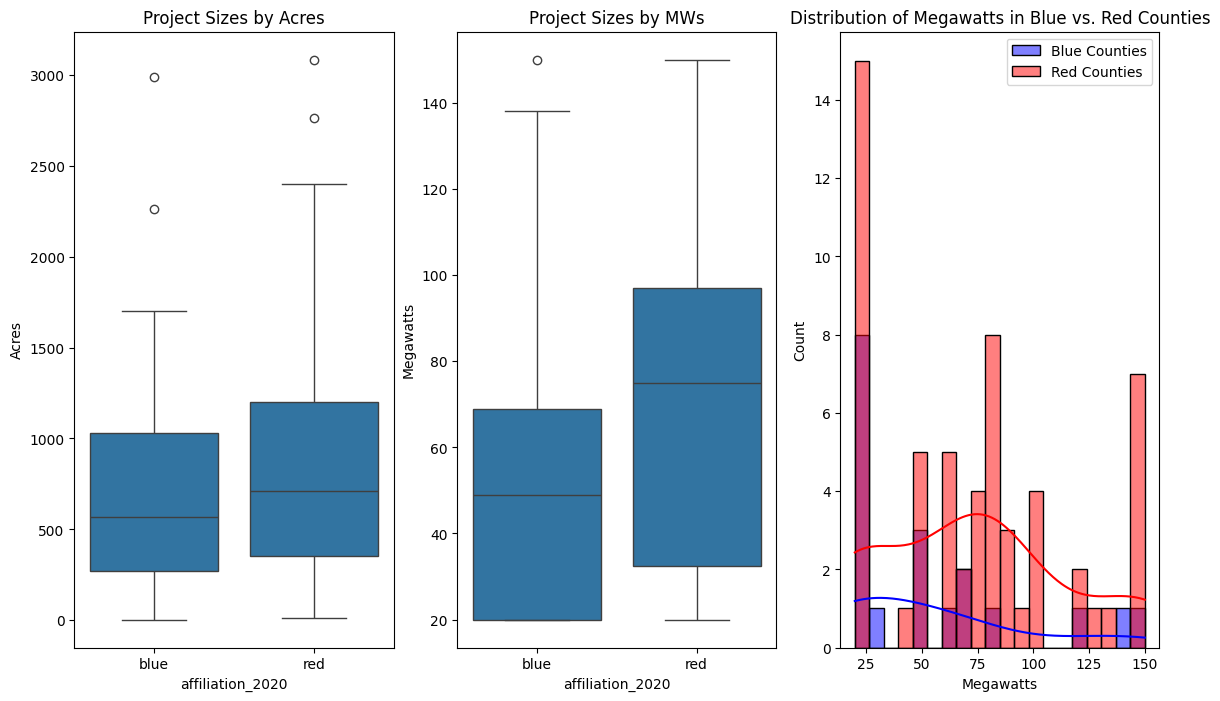

In [8]:
# Now let's look at the distribution of project sizes (both by acre and by MW) per blue and red counties
plt.figure(figsize=(14, 8))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(
    x='affiliation_2020',
    y='total_acres',
    data=affiliated_df
)
plt.ylabel('Acres')
plt.title('Project Sizes by Acres')

ax2 = plt.subplot(1, 3, 2)
sns.boxplot(
    x='affiliation_2020',
    y='megawatts',
    data=affiliated_df
)
plt.ylabel('Megawatts')
plt.title('Project Sizes by MWs')

ax3 = plt.subplot(1, 3, 3)
sns.histplot(
    x=blue_counties_with_mw['megawatts'],
    data=blue_counties_with_mw,
    bins=20,
    kde=True,
    color='blue',
    label="Blue Counties",
    alpha=0.5  # Adjust transparency
)
sns.histplot(
    x=red_counties_with_mw['megawatts'],
    data=red_counties_with_mw,
    bins=20,
    kde=True,
    color='red',
    label="Red Counties",
    alpha=0.5  # Adjust transparency
)

plt.legend()
plt.title("Distribution of Megawatts in Blue vs. Red Counties")
plt.xlabel("Megawatts")
plt.ylabel("Count")

plt.show();

In [ ]:
# Grouping the findings for the summary:

# Percent of land dedicated to solar farms:
print(f"{red_ratio * 100:.3f} percent of Red localities are currently solar farms ")
print(f"{blue_ratio * 100:.3f} % of Blue localities are currently solar farms ")

# MW per capita (MW per 1000 people):
print(f"There are {blue_mw_per_1000:.3f} MWs per 1000 people in Blue localities")
print(f"There are {red_mw_per_1000:.3f} MWs per 1000 people in Red localities")

# Solar farm efficiency:
print(f"Solar farms in Blue localities generate {blue_mw_per_solar_land} MWs per mile")
print(f"Solar farms in Red localities generate {red_mw_per_solar_land} MWs per mile")

# Solar farm frequency:
print(f"Red localities are {rate_red_over_blue} times more likely to have solar projects in them.")

# Total mw count:
print(f"There are a total of {total_red} mw on red affiliated localities")
print(f"There are a total of {total_blue} mw on blue affiliated localities")

# Solar farm count:
print("Red, and blue solar farm counts:")
print(len(red_aff_df))
print(len(blue_aff_df))


0.280 % of Red localities are currently solar farms 
0.500 % of Blue localities are currently solar farms 
There are 0.556 MWs per 1000 people in Blue localities
There are 1.760 MWs per 1000 people in Red localities
Solar farms in Blue localities generate 41.4635377239465 MWs per mile
Solar farms in Red localities generate 52.0385169459398 MWs per mile
Red localities are 1.6775559588626738 times more likely to have solar projects in them.
There are a total of 4289.6 mw on red affiliated localities
There are a total of 1027.0 mw on blue affiliated localities
Red, and blue solar farm counts:
59
19


# Summary:
There's a clear trend between Red and Blue localities when it comes to producing utility-scale solar power, that also reflects the trends from the demographic file. Although Blue localities allocate more land towards solar farms than Red ones do, Red localities are much more efficient in their production. This is indicative of how much more efficient large-scale projects are than small ones. Multiple small solar farms require additional buffer zones that add to project size but take away from MW production. Larger projects are able to squeeze in more solar panels per acre, creating more efficient solar farms. It's reasons like these that developers continue to prioritize rural counties for development, as not only do they feature more attractive zoning regulations, but they are much more profitable per square mile.